In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

## Task 1
<b> Згенеруйте синтетичний набір точок виду y = ax + b + noise. Візуалізуйте результат за
допомогою (matplotlib). Вирішіть задачу лінійної регресії для такого набору точок.
Параметри моделі знайдіть за допомогою градієнтного спуску. Порівняйте знайдені
параметри із значеннями (a, b). <b>

<b>CostFunction:  </b>
\begin{equation}
   J(\theta) = 1/2m \sum_{i=1}^{m} (h(\theta)^{(i)} - y^{(i)})^2
\end{equation}

<b>Gradient: </b>
\begin{equation}
\frac{\partial J(\theta)}{\partial \theta_j} = 1/m\sum_{i=1}^{m}(h(\theta^{(i)} - y^{(i)}).X_j^{(i)}
\end{equation}


In [2]:
# Задаем начальные коэффициенты a и b
a_start = 3
b_start = 3


In [3]:
# Строим синтетический набор данных x_train and y_train
np.random.seed(42)
sz = 500
noise = np.random.normal(0, 1, sz)
x_train = np.random.uniform(0, 1, sz)
y_train = a_start + b_start* x_train +  noise

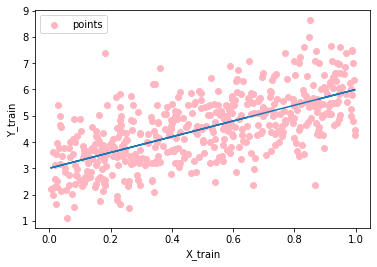

In [4]:
# Изобразим расположение точек созданных точек
plt.scatter(x_train,y_train,c='lightpink', label='points')
plt.plot(x_train, a_start * x_train + b_start)
plt.xlabel('X_train')
plt.ylabel('Y_train')
plt.legend()
plt.show()


### Gradient Descent

In [5]:
# Рандомные параметры, которые будем использовать для реализации
a_curr = random.randint(0,50)
b_curr = random.randint(0,50)
learning_rate = 0.01 # скорость обучения
iterations = 10000 # количество операций

print("Выбранные параметры ",' a = ',a_curr,' b = ', b_curr)

for i in range(iterations):
    y_pred = a_curr + b_curr * x_train
    loss = y_train - y_pred # отклонение результата
    a_grad = -2 * loss.mean()
    b_grad = -2 * (x_train * loss).mean()
    a_curr = a_curr - learning_rate * a_grad
    b_curr = b_curr - learning_rate * b_grad
print("Начальные пармаметры для генерации датасета ",' a = ',a_start,' b = ', b_start)
print("Полученные параметры ",' a = ',a_curr,' b = ', b_curr)

Выбранные параметры   a =  9  b =  5
Начальные пармаметры для генерации датасета   a =  3  b =  3
Полученные параметры   a =  3.024892741741859  b =  2.963959106511809


In [6]:
e = 0.2
if abs(a_curr - a_start) < e and abs(b_curr - b_start) < e:
    print("Actual result == Expected result")
else:
    print("Error 404")


Actual result == Expected result


# Task 2
<b>Згенеруйте два синтетичних набори точок на площині, додайте ім мітки класів (0 і 1).
Візуалізуйте результат за допомогою (matplotlib). Розділіть дані на класи за допомогою
логістичної регресії. Перевірте якість алгоритма за допомогою метрики accuracy (на
тестових даних).<b>

In [7]:
# Строим 2 синтетических набора данныха x_train, y_train and x_test, y_test
np.random.seed(42)
sz = 100

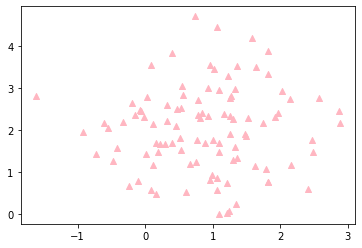

In [8]:
mean_1 = [1, 2]
cov_1 = [[1, 0], [0, 1]]
x_1 = np.random.multivariate_normal(mean_1, cov_1, sz)
plt.scatter(x_1[:, 0], x_1[:, 1], marker = '^', color='lightpink')


In [9]:
mean_2 = [4, 5]
cov_2 = [[2, 0], [0, 2]]
x_2 = np.random.multivariate_normal(mean_2, cov_2, sz)


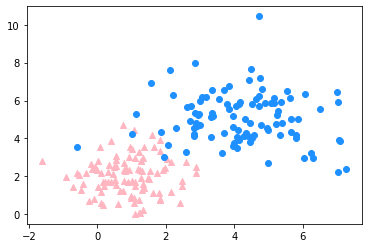

In [10]:
plt.scatter(x_1[:, 0], x_1[:, 1], marker = '^', color='lightpink')
plt.scatter(x_2[:, 0], x_2[:, 1], marker = 'o', color='dodgerblue')


In [11]:
# generation of synthetic dataset for classification problem: data(x) and labels
X = np.concatenate([x_1, x_2])
Y = np.array([0] * sz + [1] *  sz)

In [12]:
#random.shuffle(Y)
X_train, X_test = X[:150,:], X[50:,:]
Y_train, Y_test = Y[:150], Y[50:]

print(X.shape)
print(Y.shape)
print(X_test.shape)
print(X_train.shape)
print(Y_test.shape)
print(Y_train.shape)

(200, 2)
(200,)
(150, 2)
(150, 2)
(150,)
(150,)


## Logistic Regression


In [13]:
class LogisticRegression:
    def __init__( self, learning_rate, iterations ) :
        self.learning_rate = learning_rate
        self.iterations = iterations

    def fit( self, X, Y ) :
        self.m, self.n = X.shape
        self.W = np.zeros( self.n )
        self.b = 0
        self.X = X
        self.Y = Y
        for i in range( self.iterations ) :
            A = 1 / ( 1 + np.exp( - ( self.X.dot( self.W ) + self.b ) ) )
            #счмиаем градиент
            tmp = ( A - self.Y.T )
            tmp = np.reshape( tmp, self.m )
            dW = np.dot( self.X.T, tmp ) / self.m
            db = np.sum( tmp ) / self.m
            self.W = self.W - self.learning_rate * dW
            self.b = self.b - self.learning_rate * db
        return self
    def predict( self, X ) :
        Z = 1 / ( 1 + np.exp( - ( X.dot( self.W ) + self.b ) ) )
        Y = np.where( Z > 0.5, 1, 0 )
        return Y

In [14]:
learning_rate = 0.01 # скорость обучения
iterations = 10000 # количество операций
model = LogisticRegression( learning_rate, iterations )
model.fit( X_train, Y_train )

In [15]:
Y_pred = model.predict( X_test )


In [16]:
def accuracy(Y_test,Y_pred):
    correctly_classified = 0
    count = 0
    for count in range( np.size( Y_pred ) ) :
        if Y_test[count] == Y_pred[count] :
            correctly_classified = correctly_classified + 1
        count = count + 1
    print( "Точность: ", (correctly_classified / count ) * 100 )

In [17]:
accuracy(Y_test,Y_pred)

Точность:  96.0
